In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
matplotlib inline

# Aprendizado de Máquina

Muitas pessoas imaginam que a ciência de dados é principalmente aprendizado de máquina e que os cientistas de dados constroem e treinam e ajustam modelos de aprendizado de máquinas o dia todo. (Na verdade, muitas vezes a ciência de dados está transformando problemas de negócios em problemas de dados, e coletando dados, e entendendo dados, e limpando dados, e formatando dados, após os quais o aprendizado de máquina é quase uma tarefa tardia. Mesmo assim, é um acréscimo interessante e essencial que você praticamente precisa saber para fazer ciência de dados.

## Modelagem

Antes de podermos falar sobre aprendizado de máquina, precisamos falar sobre modelos. O que é um modelo? É simplesmente uma especificação de um relacionamento matemático (ou probabilístico) que existe entre diferentes variáveis. Por exemplo, se você está tentando arrecadar dinheiro para seu site de rede social, pode criar um modelo de negócios (provavelmente em uma planilha) que aceita entradas como "número de usuários" e "receita de anúncios por usuário" e "número de funcionários" e gera seu lucro anual nos próximos anos. Uma receita de livro implica um modelo que relaciona insumos como "número de comedores" e "fome" para quantidades de ingredientes necessários. E se você já assistiu poker na televisão, você sabe que eles estimam a "probabilidade de ganho" de cada jogador em tempo real com base em um modelo que leva em conta as cartas que foram reveladas até o momento e a distribuição das cartas no baralho.

O modelo de negócios é provavelmente baseado em relações matemáticas simples: lucro é receita menos despesas, receita é unidades vendidas vezes preço médio e assim por diante. O modelo de receita provavelmente se baseia em tentativa e erro - alguém foi a uma cozinha e experimentou combinações diferentes de ingredientes até encontrar um que eles gostassem. E o modelo de pôquer é baseado na teoria da probabilidade, nas regras do pôquer e em algumas suposições razoavelmente inócuas sobre o processo aleatório pelo qual as cartas são distribuídas.

## O que é aprendizado de máquina?

Todos têm sua própria definição exata, mas usaremos o *aprendizado de máquina* para nos referirmos à criação e ao uso de modelos que são *aprendidos com os dados*. Em outros contextos, isso pode ser chamado de *modelagem preditiva* ou *mineração de dados*, mas continuaremos com o aprendizado de máquina. Tipicamente, nosso objetivo será usar os dados existentes para desenvolver modelos que possamos usar para prever vários resultados para novos dados, como:

* Prever se uma mensagem de email é spam ou não;
* Prever se uma transação com cartão de crédito é fraudulenta;
* Prever em qual anúncio o comprador está mais propenso a clicar;
* Prever qual time de futebol vai ganhar o Super Bowl;

Analisaremos tanto modelos *supervisionados* (nos quais há um conjunto de dados rotulados com as respostas corretas para aprender) e modelos *não supervisionados* (nos quais não há rótulos). Existem vários outros tipos, como *semisupervisionado* (nos quais apenas alguns poucos dados são rotulados) e *online* (nos quais o modelo precisa se ajustar continuamente aos dados recém-chegados) que não abordaremos neste curso.

Agora, mesmo na situação mais simples, existem universos inteiros de modelos que podem descrever a relação em que estamos interessados. Na maioria dos casos, nós mesmos escolheremos uma família de modelos parametrizada e, em seguida, usaremos dados para aprender parâmetros que são de alguma forma ideais.

Por exemplo, podemos supor que a altura de uma pessoa é (aproximadamente) uma função linear de seu peso e, em seguida, usar dados para saber qual é essa função linear. Ou podemos supor que uma árvore de decisão é uma boa maneira de diagnosticar quais doenças nossos pacientes têm e, em seguida, usar dados para aprender a árvore "ótima". Ao longo do restante do curso, investigaremos diferentes famílias de modelos que podemos aprender.

Mas antes que possamos fazer isso, precisamos entender melhor os fundamentos do aprendizado de máquina. Para o restante da aula, discutiremos alguns desses conceitos básicos antes de passarmos para os próprios modelos.

## *Overfitting* e *Underfitting*

Um perigo comum no aprendizado de máquina é o *overfitting* - produzir um modelo que tenha um bom desempenho nos dados em que você o treina, mas que não seja generalizado para qualquer novo dado. Isso pode envolver o ruído de aprendizado nos dados. Ou pode envolver aprender a identificar entradas específicas em vez de quaisquer fatores que sejam realmente preditivos para o resultado desejado.

O outro lado disso é o *underfitting*, que ocorre quando produzimos  um modelo que não tem um bom desempenho, mesmo nos dados de treinamento, embora, normalmente, quando isso acontece, você decide que seu modelo não é bom o suficiente e continua procurando um modelo melhor.

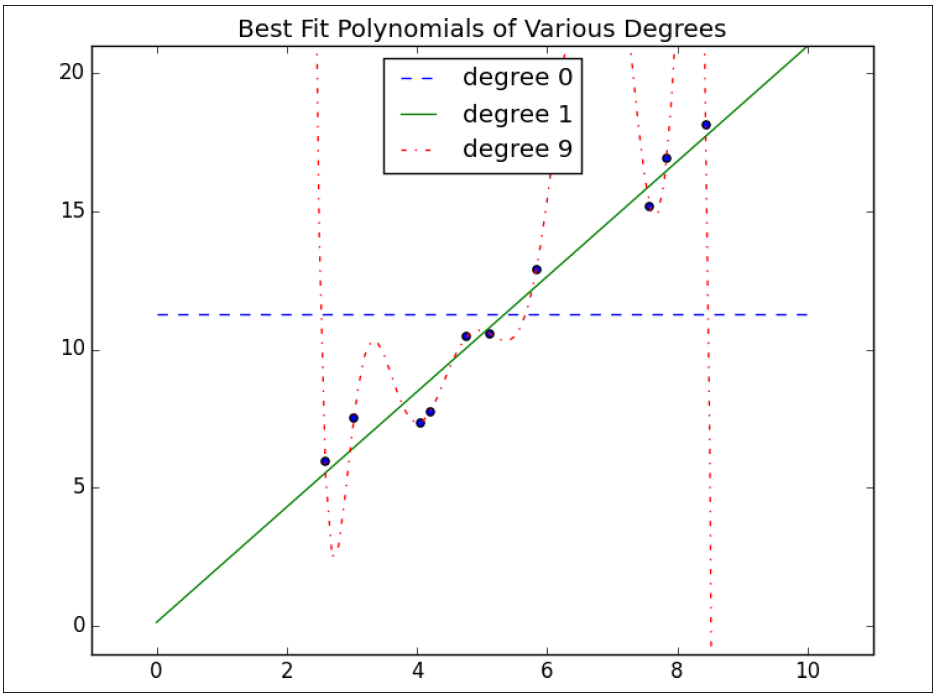

Na Figura acima, três polinômios foram ajustados para uma amostra de dados. (Não se preocupe sobre como; vamos abordar isso em aulas posteriores).

A linha horizontal mostra o melhor ajuste para um polinômio de grau 0 (isto é, constante). Há um severo *underfitting* desse ajuste sobre os dados de treinamento. O polinômio de melhor ajuste de grau 9 (isto é, 10 parâmetros) passa exatamente por todos os pontos de dados de treinamento, mas há um *overfit* claro, ou seja, se escolhêssemos mais alguns pontos de dados, seria muito provável que eles não seriam bem ajustados pelo modelo. Por fim, o polinômio de grau 1 apresenta um bom equilíbrio, ou seja, é bem próximo de todos os pontos e (se esses dados forem representativos), a linha provavelmente também estará próxima de novos pontos de dados.

Claramente, os modelos que são muito complexos levam ao *overfitting* e não generalizam muito além dos dados em que foram treinados. Então, como podemos garantir que nossos modelos não sejam muito complexos? A abordagem mais fundamental envolve o uso de dados diferentes para treinar o modelo e testar o modelo.

A maneira mais simples de fazer isso é dividir seu conjunto de dados, de modo que (por exemplo) dois terços dele seja usado para treinar o modelo e, depois do treino, mediremos o desempenho do modelo no terço restante:

In [3]:
def split_data(data, prob):
    """split data into fractions [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

Muitas vezes, temos uma matriz $\mathbf{X}$ de variáveis de entrada e um vetor $\mathbf{y}$ de variáveis de saída. Nesse caso, precisamos nos certificar de colocar os valores correspondentes juntos nos dados de treinamento ou nos dados de teste:

In [4]:
def train_test_split(x, y, test_pct):
    data = zip(x, y)                              # pair corresponding values  
    train, test = split_data(data, 1 - test_pct)  # split the dataset of pairs
    x_train, y_train = zip(*train)                # magical un-zip trick
    x_test, y_test = zip(*test)
    return x_train, x_test, y_train, y_test

E aí você pode fazer algo como:

```
model = SomeKindOfModel()
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.33)
model.train(x_train, y_train)
performance = model.test(x_test, y_test)
```

Apesar de estarmos no início, podemos começar a brincar com esses conceitos que aprendemos. Vamos propor um modelo para prever em qual posição um jogador de basquete deve jogar a partir da sua altura e peso. Para treinar o modelo, vamos usar os dados de jogadores da NBA que temos:

In [5]:
df = pd.read_csv("./data/nba_ht_wt.csv")
df

,Player,Pos,Height,Weight,Age
0,Nate Robinson,G,69,180,29
1,Isaiah Thomas,G,69,185,24
2,Phil Pressey,G,71,175,22
3,Shane Larkin,G,71,176,20
4,Ty Lawson,G,71,195,25
5,John Lucas III,G,71,157,30
6,D.J. Augustin,G,72,180,25
7,Kyle Lowry,G,72,205,27
8,Sebastian Telfair,G,72,175,28
9,Will Bynum,G,72,185,30


Os nossos rótulos são as posições, enquanto as colunas `Height` e `Weight` são as informações que vamos usar para treinar o modelo.

In [6]:
data = df.values
ys = data[:,1]        #posicoes
xs = data[:,2:4]      #altura e peso
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.33)
print("no treino, ", x_train[0], " é ", y_train[0])
print("no teste, ", x_test[0], " é ", y_test[0])

no treino,  [69 180]  é  G
no teste,  [71 195]  é  G


Agora vamos criar um modelo simples para prever a posição de um jogador dada a sua altura e peso. De forma bem ingênua, vamos combinar o peso a altura de um jogador em uma variável de nome *tamanho*, que será dada simplesmente pela multiplicação desses valores:

$tamanho = peso \times altura$

A partir do meu conhecimento do domínio, sei que armadores (posição *G*) são normalmente menores que alas (posição *F*), que são normalmente menores que pivôs (posição *C*). Assim, o nosso modelo vai indicar que todos os jogadores com *tamanho* menor que um limiar $t_G$ serão considerados armadores (*G*). Da mesma forma, todos os jogadores com *tamanho* maior que um limiar $t_C$ serão considerados pivôs (*C*). Os restantes serão considerados alas (*F*). 

A pergunta que fica agora é: quais sãos os melhores valores de $t_G$ e $t_C$? Para encontrar esses valores, vamos treinar o nosso modelo com os dados do conjunto de treino. E o que significa treinar o modelo? Significa encontrar os valores de $t_G$ e $t_C$ que *maximizam* uma função de qualidade. 

Para simplificar, a nossa função de qualidade será apenas o *número de acertos*, ou seja, quantas vezes o nosso modelo foi capaz de acertar as posições dados os valores de $t_G$ e $t_C$.

Também para simplificar, a otimização do modelo será feita a partir de uma busca em *grid* simples. Para uma sequência de valores de $t_G$ e uma sequência de valores de $t_C$, vamos encontrar o par ($t_G*, t_C*)$ que gera, no conjunto de treino, o maior *número de acertos*.

In [7]:
class PosModel:

    def __init__(self):
        self.tG = 0
        self.tC = 0
        self.n_train = 0
        self.hits_train = 0
        self.n_test = 0
        self.hits_test = 0
        
    def getSize(self, features):
        return features[0]*features[1]
    
    def getMinSize(self, x):
        return min([self.getSize(xi) for xi in x])
    
    def getMaxSize(self, x):
        return max([self.getSize(xi) for xi in x])    

    def getNumberOfHits(self, tG, tC, x, y):
        hits = 0
        n = len(y)
        for i in np.arange(n):
            pos = 'F'
            size = self.getSize(x[i])
            if size < tG:
                pos = 'G'
            elif size > tC:
                pos = 'C'
            if(pos == y[i]):
                hits = hits + 1
        return hits

    def train(self, x_train, y_train):
        self.n_train = len(y_train)
        minvalue = self.getMinSize(x_train)
        maxvalue = self.getMaxSize(x_train)
        #grid search   
        #for tg in np.arange(60*150,90*300,100):
        for tG in np.linspace(minvalue, maxvalue, 100):
            for tC in np.linspace(tG,maxvalue,100):
                hits = self.getNumberOfHits(tG, tC, x_train, y_train)
                if hits > self.hits_train:
                    self.hits_train = hits
                    self.tG = tG
                    self.tC = tC
                    
    def test(self, x_test, y_test): 
        self.n_test = len(y_test)
        self.hits_test = self.getNumberOfHits(self.tG, self.tC, x_test, y_test)
        return self.hits_test/self.n_test


In [8]:
model = PosModel()
model.train(x_train, y_train)
print("acurácia no conjunto de treino:", model.hits_train/model.n_train)
print("acurácia no conjunto de teste:", model.test(x_test, y_test))

acurácia no conjunto de treino: 0.7921686746987951
acurácia no conjunto de teste: 0.8092485549132948


Se o modelo for um *overfit* para os dados de treinamento, esperamos que ele tenha um desempenho muito ruim nos dados de teste (completamente separados). Dito de forma diferente, se o desempenho for bom nos dados de teste, você poderá ter mais confiança de que é o modelo é mais *fitting* que *overfitting*.

No entanto, isso pode dar errado de algumas formas.

A primeira é se há padrões comuns nos dados de teste e treinamento que não seriam generalizados para um conjunto de dados maior.

Por exemplo, imagine que seu conjunto de dados consiste em atividade do usuário, uma linha por usuário por semana. Nesse caso, a maioria dos usuários aparecerá nos dados de treinamento e nos dados de teste. Dessa forma, alguns modelos podem aprender a *identificar* os usuários em vez de descobrir os relacionamentos que envolvem *atributos*. Isso não é uma grande preocupação, embora não é raro que cientistas de dados experimentem isso pelo menos uma vez.

Um problema maior é se você usar a divisão dos conjuntos de teste e treino não apenas para julgar um modelo, mas também para escolher dentre muitos modelos. Nesse caso, embora cada modelo individual possa não ser *overfit*, o "escolha um modelo que tenha melhor desempenho no conjunto de testes" é um meta-treino que faz o conjunto de testes funcionar mais como um segundo conjunto de treinamento. (É claro que o modelo que apresentou melhor desempenho no conjunto de testes terá um bom desempenho no conjunto de testes.)

Em tal situação, você deve dividir os dados em três partes: um conjunto de treinamento para construir modelos, um conjunto de validação para escolher entre modelos treinados e um conjunto de testes para julgar o modelo final, que não foi usado em nenhum momento durante a escolha do modelo.

## Corretude

Quando não estou fazendo ciência de dados, me dedico à medicina. E no meu tempo livre, eu tenho um teste barato e não invasivo que pode ser dado a um bebê recém-nascido que prevê - com mais de 98% de precisão - se o recém-nascido irá desenvolver leucemia. Meu advogado me convenceu de que o teste não é patenteável, então vou compartilhar com você os detalhes aqui: preveja a leucemia se e somente se o bebê tiver o nome de Luke (que soa como uma espécie de "*leukemia").

Como veremos abaixo, esse teste é de fato mais de 98% preciso. No entanto, é um teste incrivelmente estúpido e uma boa ilustração do motivo pelo qual normalmente não usamos "precisão" para medir o quão bom é um modelo.

Imagine construir um modelo para fazer um julgamento binário. Este e-mail é spam? Devemos contratar esse candidato? Esse viajante aéreo é secretamente um terrorista?

Dado um conjunto de dados rotulados e um modelo preditivo, todos os pontos de dados estão em uma das quatro categorias:

* Verdadeiro positivo: "Esta mensagem é spam e previmos corretamente spam".
* Falso positivo (Erro tipo 1): "Esta mensagem não é spam, mas previmos spam."
* Falso negativo (Erro Tipo 2): "Esta mensagem é spam, mas previmos não spam."
* Verdadeiro negativo: "Esta mensagem não é spam e previmos corretamente que não seja spam".

Nós frequentemente representamos isso como contagens em uma matriz de confusão:

|Modelo|Spam|notSpam|
|------|----|-------|
|previu "Spam"|Verdadeiro Positivo|Falso Positivo|
|previu "Não Spam"|Falso Negativo|Verdadeiro Negativo|

Vamos ver como meu teste de leucemia se encaixa nessa estrutura. Hoje em dia, aproximadamente [5 bebês em 1.000](https://www.babycenter.com/baby-names-luke-2918.htm) são chamados de Lucas. E a prevalência ao longo da vida da leucemia é de cerca de 1,4%, ou [14 em cada 1.000 pessoas](https://seer.cancer.gov/statfacts/html/leuks.html).

Se acreditarmos que esses dois fatores são independentes e aplicarmos o teste "Lucas é para leucemia" a 1 milhão de pessoas, esperamos ver uma matriz de confusão como:

|Modelo|Leucemia|Sem Leucemia|Total|
|-----|--------|------------|-----|
|"Luke"|70|4930|5000|
|Não "Luke"|13930|981070|99500|
|Total|14000|986000|1000000|

Podemos, então, usar a matriz de confusão para calcular várias estatísticas sobre o desempenho do modelo. Por exemplo, a acurácia é definida como a fração de previsões corretas:

In [9]:
def accuracy(tp, fp, fn, tn):
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

In [10]:
print("acurácia: ", accuracy(70, 4930, 13930, 981070))

acurácia:  0.98114


Isso parece ser um número impressionante. Mas é claro que esse não é um bom teste, o que significa que provavelmente não devemos dar muita credibilidade à acurácia bruta.

É comum observar a combinação de precisão e revocação (*recall*). A precisão mede quão precisas foram nossas previsões positivas:

In [11]:
def precision(tp, fp, fn, tn):
    return tp / (tp + fp)

In [12]:
print("precisão: ", precision(70, 4930, 13930, 981070))

precisão:  0.014


A revocação (*recall*) mede a fração dos positivos que o nosso modelo foi capaz de recuperar (ou identificar):

In [13]:
def recall(tp, fp, fn, tn):
    return tp / (tp + fn)

In [14]:
print("revocação: ", recall(70, 4930, 13930, 981070))

revocação:  0.005


Estes são ambos números terríveis, refletindo que este é um modelo horrível.

Às vezes precisão e revocação são combinados na *pontuação F1* (ou *F1 score*), que é definida como:

In [15]:
def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p + r)

In [16]:
print("F1 score:", f1_score(70, 4930, 13930, 981070))

F1 score: 0.00736842105263158


Esta é a média harmônica entre a precisão e a revocação e, necessariamente, fica entre eles.

Normalmente, a escolha de um modelo envolve uma troca entre precisão e revocação. Um modelo que prevê "sim" quando está pouco confiante provavelmente terá uma alta revocação, mas uma baixa precisão; um modelo que prevê "sim" apenas quando é extremamente confiante é provável que tenha um *recall* baixo e uma alta precisão.

Alternativamente, você pode pensar nisso como um trade-off entre falsos positivos e falsos negativos. Dizer "sim" com muita frequência lhe dará muitos falsos positivos; dizer "não" muitas vezes lhe dará muitos falsos negativos.

Imagine que houvesse 10 fatores de risco para a leucemia, e quanto mais deles você tivesse maior a probabilidade de desenvolver leucemia. Nesse caso, você pode imaginar uma série de testes: "preveja leucemia se há pelo menos um fator de risco", "preveja leucemia se há pelo menos dois fatores de risco" e assim por diante. À medida que você aumenta o limite, aumenta a precisão do teste (já que as pessoas com mais fatores de risco têm maior probabilidade de desenvolver a doença) e diminui o recall do teste (uma vez que cada vez menos causadores de doenças atingirão o limiar). Em casos como este, escolher o limite correto é uma questão de encontrar o trade-off correto.

## O trade-off de viés-variância

Outra maneira de pensar sobre o problema do overfitting é como um trade-off entre viés e variância.

Ambas são medidas do que aconteceria se você fosse treinar seu modelo muitas vezes em diferentes conjuntos de dados de treinamento (da mesma população).

Por exemplo, o modelo de grau 0 que vimos acima cometerá muitos erros para praticamente qualquer conjunto de treinamento (retirado da mesma população), o que significa que ele tem um alto *viés*. No entanto, quaisquer dois conjuntos de treino escolhidos aleatoriamente devem fornecer modelos bastante similares (uma vez que quaisquer dois conjuntos de treino escolhidos aleatoriamente devem ter valores médios bastante similares). Então, dizemos que eles tem uma *variância* baixa. Alto viés e baixa variância normalmente correspondem a *underfitting*.

Por outro lado, o modelo de grau 9 se ajusta perfeitamente ao conjunto de treinamento. Tem um viés muito baixo, mas uma variação muito alta (uma vez que quaisquer dois conjuntos de treinamento provavelmente dariam origem a modelos muito diferentes). Isso corresponde ao *overfitting*.

Pensar nos problemas do modelo dessa maneira pode ajudar você a descobrir o que fazer quando o modelo não funciona tão bem. Se o seu modelo tem alto viés (o que significa que ele apresenta um desempenho ruim, mesmo em seus dados de treinamento), uma coisa é tentar adicionar mais *features* (falaremos mais disso em seguida). Vimos que apssar do modelo de grau 0 para o modelo de grau 1 acarretará em uma grande melhoria.

Se seu modelo tiver alta variância, você poderá remover recursos da mesma forma. Mas outra solução é obter mais dados (se puder).

Na figura abaixo, ajustamos um polinômio de grau 9 a amostras de tamanhos diferentes. O ajuste do modelo baseado em 10 pontos de dados está em todo o lugar, como vimos antes. Se, em vez disso, treinamos 100 pontos de dados, há muito menos *overfitting*. E o modelo treinado a partir de 1000 pontos de dados é muito semelhante ao modelo de grau 1.

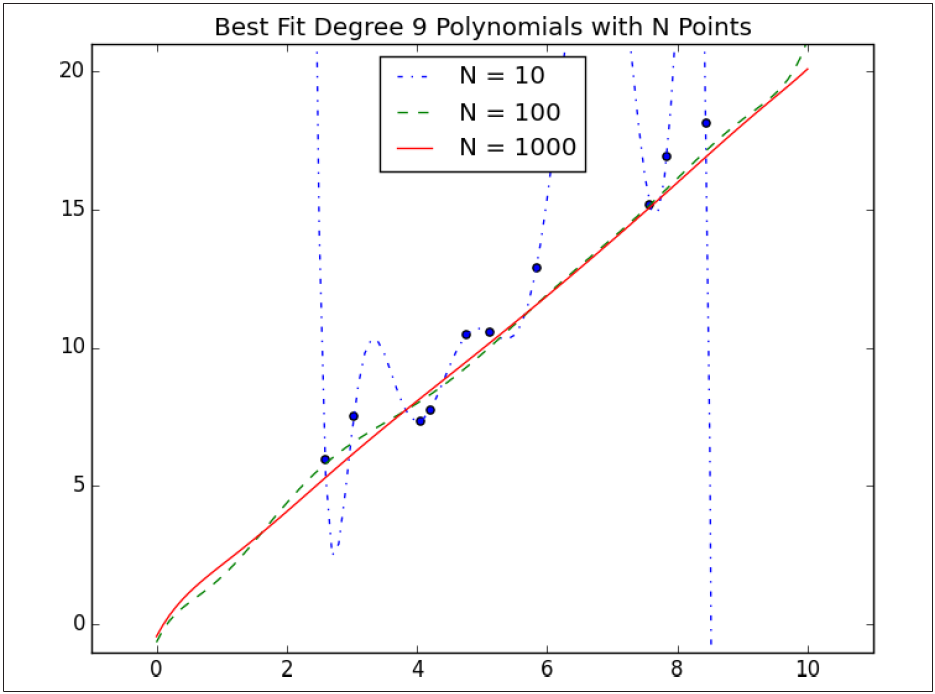

Mantendo a complexidade do modelo constante, quanto mais dados você tiver, menos *overfitting* você terá.

Por outro lado, mais dados não ajudam no viés. Se seu modelo não usa recursos suficientes para capturar regularidades nos dados, usar mais dados não ajudará.

## Extração e seleção de *features*

Como mencionamos, quando seus dados não têm *features* suficientes, é provável que seu modelo seja inadequado, ou seja, que ocorra *undefitting*. E quando seus dados têm muitas *features*, é fácil ocorrer *overfitting*. Mas o que são *features* e de onde elas vêm?

*Features* são quaisquer entradas que fornecemos ao nosso modelo.

No caso mais simples, *features* são simplesmente fornecidas a você. Se você quiser prever o salário de alguém com base em seus anos de experiência, então anos de experiência são a único *feature* que você tem.

(Embora, como vimos anteriormente, você também pode considerar usar anos de experiência ao quadrado, ao cubo e assim por diante, se isso ajudar a criar um modelo melhor.)

As coisas se tornam mais interessantes à medida que seus dados se tornam mais complicados. Imagine tentar criar um filtro de spam para prever se um e-mail é lixo ou não. A maioria dos modelos não sabe o que fazer com um e-mail bruto, que é apenas uma coleção de texto. Você precisará extrair *features*. Por exemplo:

* O email contém a palavra "Viagra"?
* Quantas vezes a letra `d` aparece?
* Qual era o domínio do remetente?

A primeira *feature* é simplesmente um sim ou um não, que normalmente codificamos como 1 ou 0. A segunda é um número. E a terceira é uma escolha de um conjunto discreto de opções.

Quase sempre, extrairemos *features* de nossos dados que se encaixam em uma dessas três categorias. Além disso, o tipo de *feature* que temos restringe o tipo de modelos que podemos usar.

O classificador *Naive Bayes* que criaremos futuramente é adequado para *features* do tipo *sim ou não*, como a primeira da lista anterior.

Modelos de regressão, que também veremos futuramente, exigem *features* numéricas (que podem incluir variáveis *dummy* que são 0s e 1s).

Há também as árvores de decisão, que veremos depois disso tudo, que podem lidar tanto com dados numéricos como categóricos.

Embora no exemplo do filtro de spam tenhamos procurado formas de criar *features*, às vezes procuramos maneiras de remover *features*.

Por exemplo, suas entradas podem ser vetores contendo centenas de números. Dependen do da situação, talvez seja apropriado destilá-las em algumas dimensões importantes (usando, por exemplo, técnicas de redução de dimensionalidade) e usar apenas um pequeno número de *features* ou correlacionadas. Ou pode ser apropriado usar uma técnica (como a regularização, que veremos em breve) que penaliza os modelos à medida que eles usam mais *features*.

Como escolhemos as *features*? É aí que entra em cena uma combinação de experiência e de especialização de domínio. Se você recebeu muitos e-mails, provavelmente acredita que a presença de certas palavras pode ser um bom indicador de spam. E você também pode ter a impressão de que o número de `d`s provavelmente não é um bom indicador de *spamminess*. Mas, em geral, você terá que experimentar coisas diferentes, o que é parte da diversão.

## Para uma maior exploração

* Continue lendo! Nas próximas aulas veremos diferentes famílias de modelos de aprendizado de máquina.
* O [curso de aprendizado de máquina do Coursera](https://www.coursera.org/learn/machine-learning) é o MOOC original e é um bom lugar para entender melhor as noções básicas de aprendizado de máquina. O [MOOC da Caltech de aprendizado de máquina](https://work.caltech.edu/telecourse.html) também é bom.
* *The Elements of Statistical Learning* é um livro um pouco canônico que pode ser [baixado online gratuitamente](https://web.stanford.edu/~hastie/ElemStatLearn//). Mas esteja avisado: é muito matemático.